In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset'

In [ ]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 2.75MB/s]


In [ ]:
!unzip '/content/heart-disease-uci.zip' -d '/content/drive/MyDrive/dataset/'  

Archive:  /content/heart-disease-uci.zip
  inflating: /content/drive/MyDrive/dataset/heart.csv  


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier                                                                                                                                                           

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn import tree

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from joblib import dump, load

from scipy.stats import norm
import pandas as pd

In [ ]:
patientData={
    "age":[input('Enter Patient Age: ')],
    "sex":[input("Enter Male - 0 or Female - 1: ")],
    "cp":[input('typical angina - 0, atypical angina - 1, non-anginal pain - 2, asymptomatic - 3 \n Enter Chest Pain Type: ')],
    "trestbps":[input('Enter BP Rate: ')],
    "chol":[input('Enter cholestoral Rate: ')],
    "fbs":[input('True - 0 or False - 1 : \n Enter Sugar rate: ')],
    "restecg":[input('range between (0,1,2) \n Enter electrocardiographic results: ')],
    "thalach":[input('Enter Patient heart rate:')],
    "exang":[input('Values between 0 or 1 \n Enter Exercise Induced Angina: ')],
    "oldpeak":[input('Value range between 0 - 6.2 ST depression induced by exercise relative to rest \n Enter ST depression:')],
    "slope":[input('Value range between 0 - 2 \n Enter the slope of the peak exercise ST segment: ')],
    "ca":[input('Enter number of major vessels (0-3) colored by flourosopy:')],
    "thal":[input("Value between thal 0 = normal; 1 = fixed defect; 2 = reversable defect \n Enter Thal:")],
}

Enter Patient Age: 50
Enter Male - 0 or Female - 1: 1
typical angina - 0, atypical angina - 1, non-anginal pain - 2, asymptomatic - 3 
 Enter Chest Pain Type: 1
Enter BP Rate: 190
Enter cholestoral Rate: 150
True - 0 or False - 1 : 
 Enter Sugar rate: 19
range between (0,1,2) 
 Enter electrocardiographic results: 1
Enter Patient heart rate:180
Values between 0 or 1 
 Enter Exercise Induced Angina: 0
Value range between 0 - 6.2 ST depression induced by exercise relative to rest 
 Enter ST depression:3.6
Value range between 0 - 2 
 Enter the slope of the peak exercise ST segment: 0
Enter number of major vessels (0-3) colored by flourosopy:3
Value between thal 0 = normal; 1 = fixed defect; 2 = reversable defect 
 Enter Thal:2


In [ ]:
df_patientData=pd.DataFrame(patientData,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

In [ ]:
def minMaxScaler(x):
  scaler = MinMaxScaler()
  x=np.array(x)
  transformer_X = scaler.fit_transform(x.reshape(x[0].shape,-1)) 
  return transformer_X
x=minMaxScaler(df_patientData)

In [ ]:
testing_CLF = load('/content/drive/MyDrive/cross_vali.joblib') 
y_Prediction_output=testing_CLF.predict(df_patientData)

In [ ]:
y_Pred=testing_CLF.predict(df_patientData)
if y_Pred==0:
  print('No heart disease')
else:
  print('heart disease')

No heart disease


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/heart.csv") 

In [ ]:
x=minMaxScaler(df)

In [ ]:
# age
# sex 
# chest pain type (4 values) - cp
# resting blood pressure - trestbps
# serum cholestoral in mg/dl - chol
# fasting blood sugar > 120 mg/dl - fbs
# resting electrocardiographic results (values 0,1,2) - restecg
# maximum heart rate achieved - thalach
# exercise induced angina - exang
# oldpeak = ST depression induced by exercise relative to rest - oldpeak
# the slope of the peak exercise ST segment - slope
# number of major vessels (0-3) colored by flourosopy - ca
# thal: Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin(protein in your red blood cells) than normal.

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


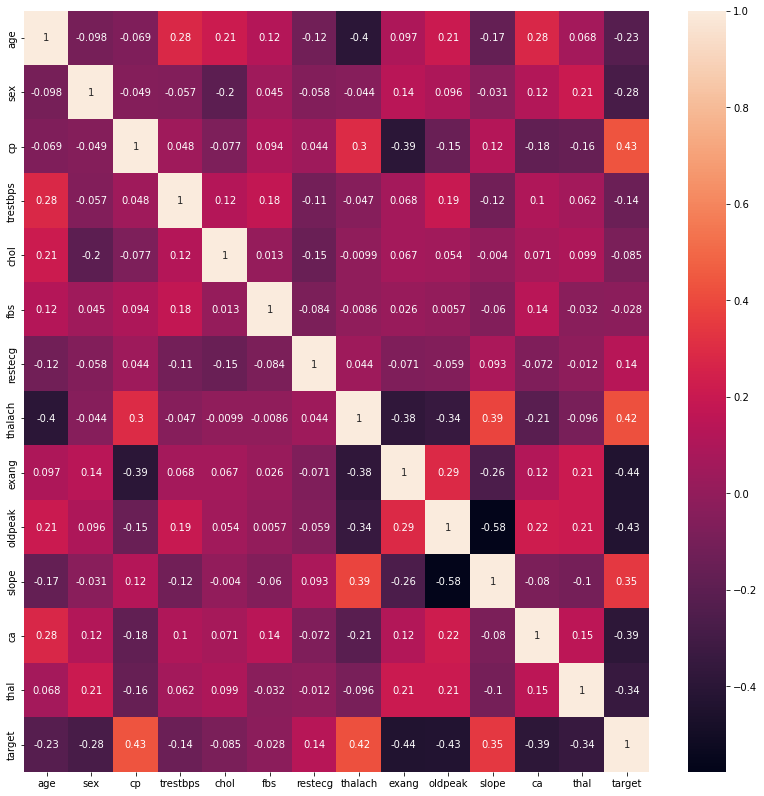

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
y=df['target']
x=df.drop('target',axis=1) 

In [ ]:
x=minMaxScaler(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f87df3fd0>,
      dtype=object)

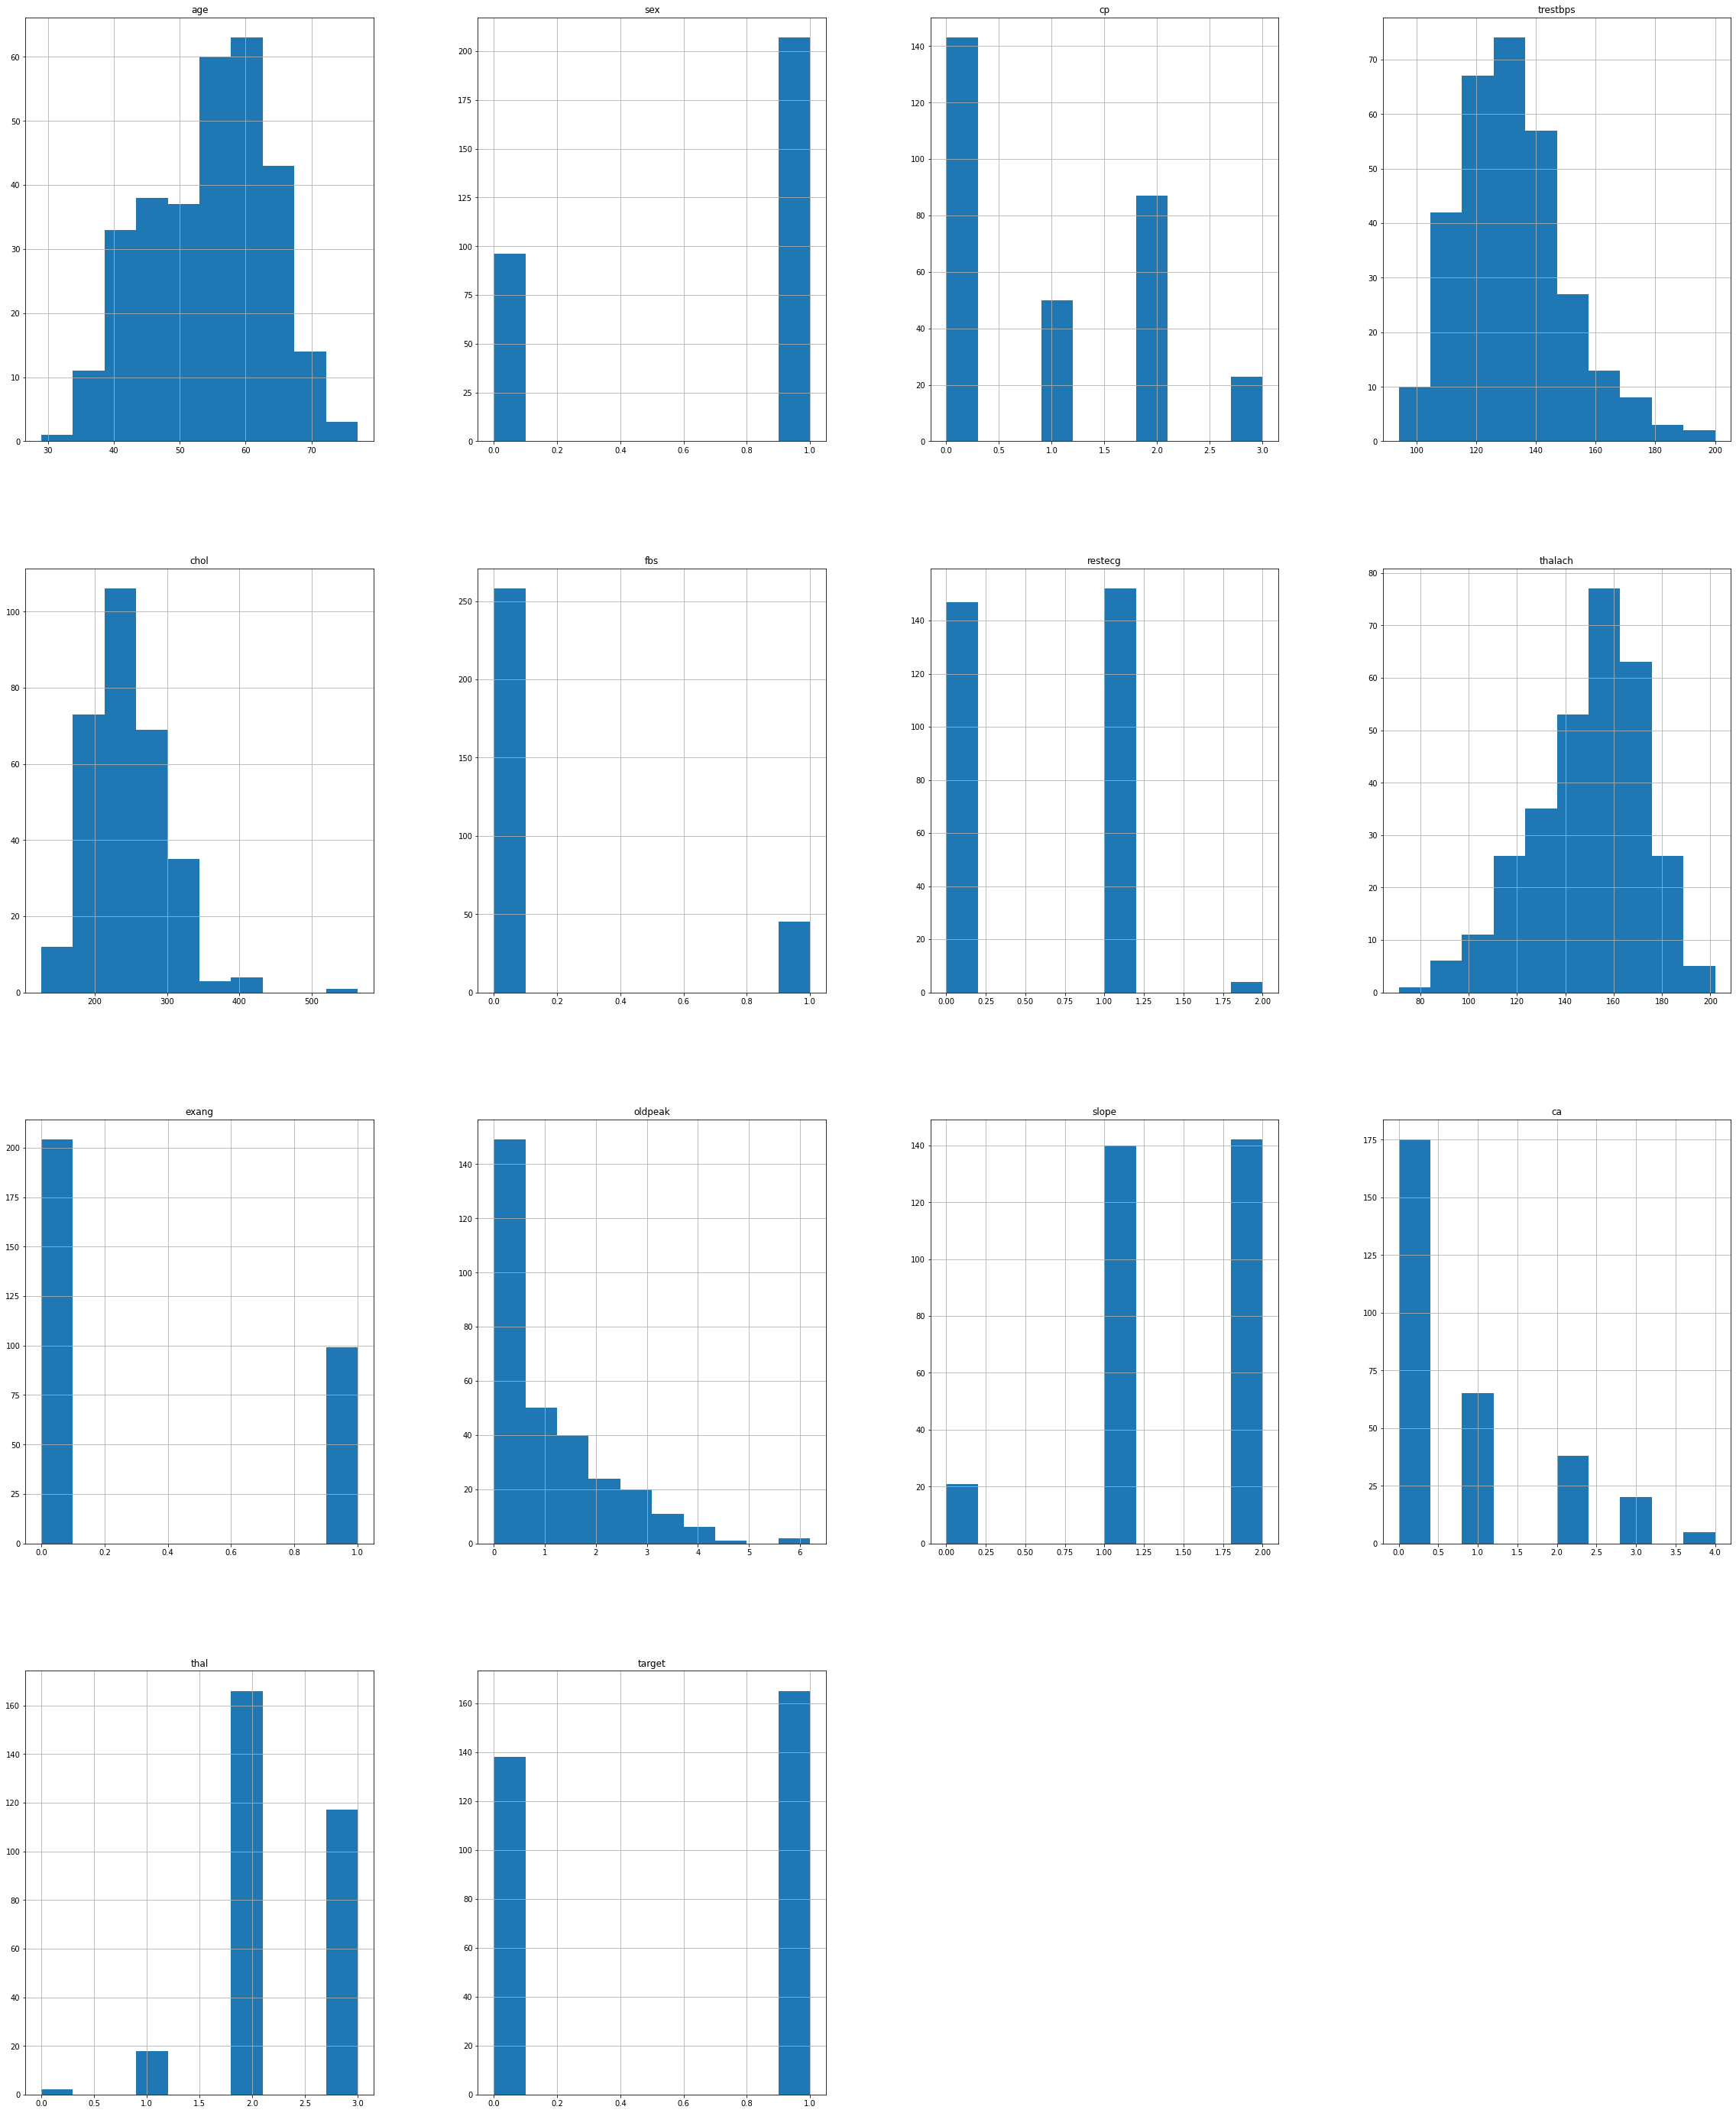

In [ ]:
fig = plt.figure(figsize = (40,50))
ax = fig.gca()
df.hist(ax=ax) 

([<matplotlib.patches.Wedge at 0x7f7e0ece5050>,
 [Text(-0.23020039407434084, 1.6338628395823251, 'Sick'),
  Text(0.23020054704761944, -1.6338628180294015, 'Healthy')],
 [Text(-0.1255638513132768, 0.8911979124994499, '54.5%'),
  Text(0.12556393475324695, -0.8911979007433097, '45.5%')])

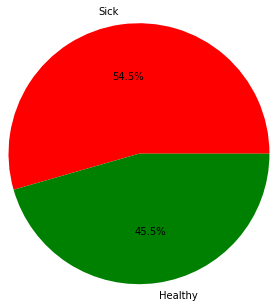

In [ ]:
# plt.figure(figsize=(14, 14))
plt.pie(df['target'].value_counts(), labels=['Sick','Healthy'], colors=['red','green'], autopct='%1.1f%%', radius=1.5) 

([<matplotlib.patches.Wedge at 0x7f7e13f26f90>,
 [Text(-0.8979367937572197, 1.3842721966495624, 'Male'),
  Text(0.8979366641522991, -1.3842722807204666, 'Female')],
 [Text(-0.48978370568575613, 0.7550575618088521, '68.3%'),
  Text(0.48978363499216304, -0.7550576076657088, '31.7%')])

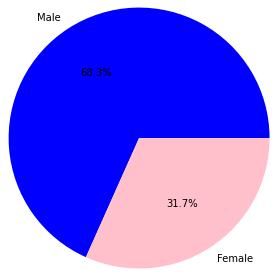

In [ ]:
plt.pie(df['sex'].value_counts(), labels=['Male','Female'], colors=['blue','pink'], autopct='%1.1f%%', radius=1.5)

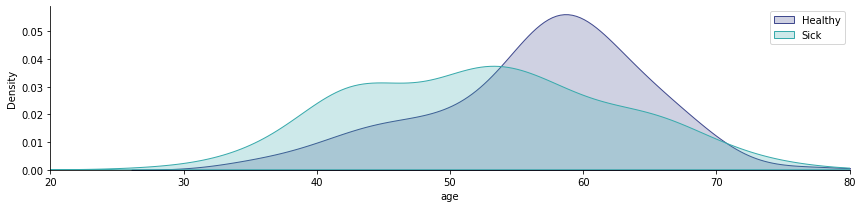

In [ ]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='mako')
fig.map(sns.kdeplot,'age',shade= True)
fig.set(xlim=(20,80))
plt.legend(labels=['Healthy' , 'Sick']) 

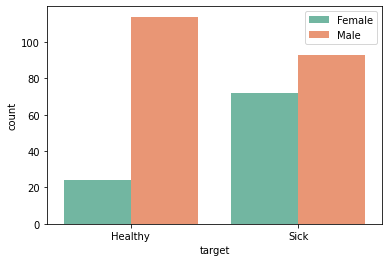

In [ ]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex', palette='Set2')
fig.set_xticklabels(labels=['Healthy', 'Sick'])
plt.legend(['Female', 'Male'])

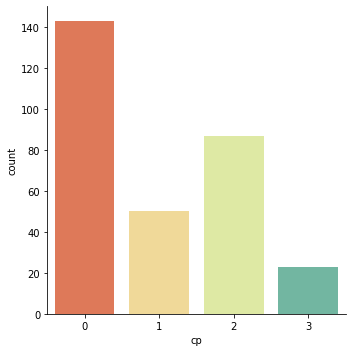

In [ ]:
#Chest Pain Type
sns.catplot(x='cp', data=df, kind="count", palette='Spectral')

[Text(0, 0, 'pain type 0'),
 Text(0, 0, 'pain type 1'),
 Text(0, 0, 'pain type 2'),
 Text(0, 0, 'pain type 3')]

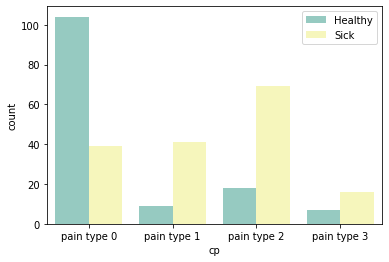

In [ ]:
#Chest Pain Type with health and sick
fig = sns.countplot(x = 'cp', data = df, hue = 'target', palette='Set3')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'])

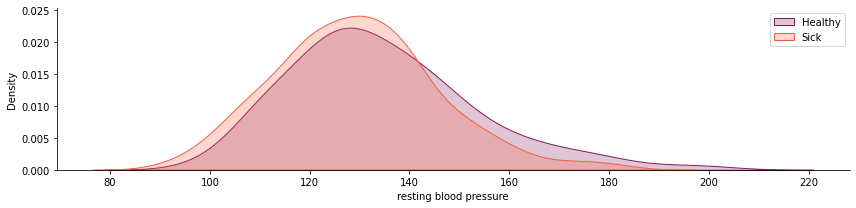

In [ ]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])
fig.set(xlabel = 'resting blood pressure')

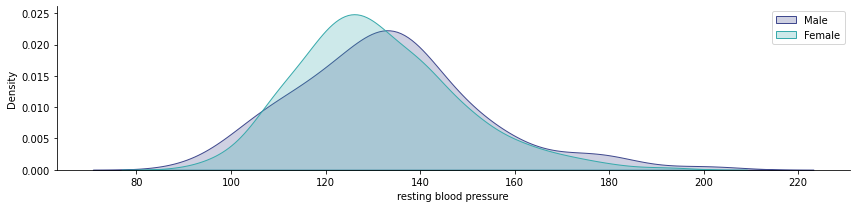

In [ ]:
fig = sns.FacetGrid(df, hue="sex",aspect=4, palette='mako')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Male' , 'Female'])
fig.set(xlabel = 'resting blood pressure')

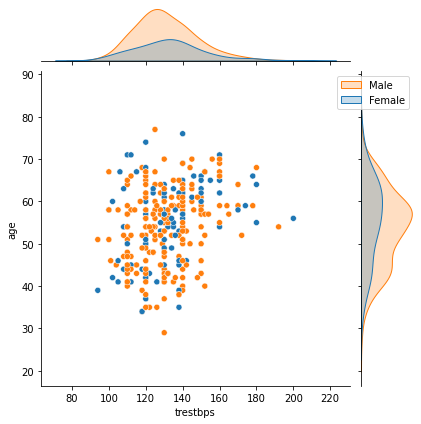

In [ ]:
sns.jointplot(data=df, x='trestbps', y='age', hue='sex', kind='scatter', legend=False)
plt.legend(labels=['Male' , 'Female'])

[Text(0, 0, 'low blood sugar'), Text(0, 0, 'high blood sugar')]

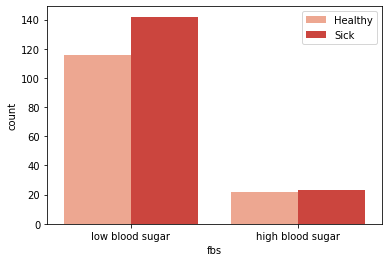

In [ ]:
fig = sns.countplot(x = 'fbs', data = df, hue = 'target', palette='Reds')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'low blood sugar','high blood sugar'])

[Text(0, 0, 'value 0'), Text(0, 0, 'value 1'), Text(0, 0, 'value 2')]

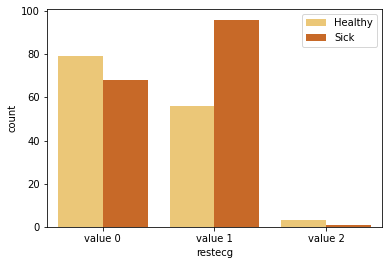

In [ ]:
fig = sns.countplot(x = 'restecg', data = df, hue = 'target', palette='YlOrBr')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'value 0','value 1', 'value 2'])

[Text(0, 0, 'healthy'), Text(0, 0, 'sick')]

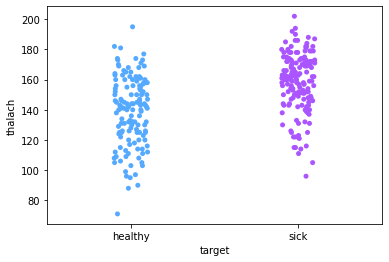

In [ ]:
fig = sns.stripplot(data=df, x='target', y='thalach', palette='cool')
fig.set_xticklabels(labels=[ 'healthy','sick'])

[Text(0, 0, 'no angina'), Text(0, 0, 'with angina')]

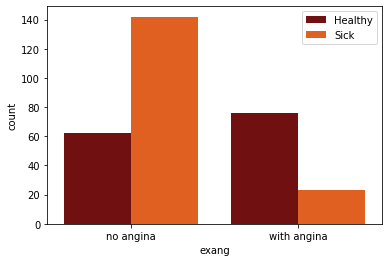

In [ ]:
fig = sns.countplot(x = 'exang', data = df, hue = 'target', palette='gist_heat')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'no angina','with angina'])

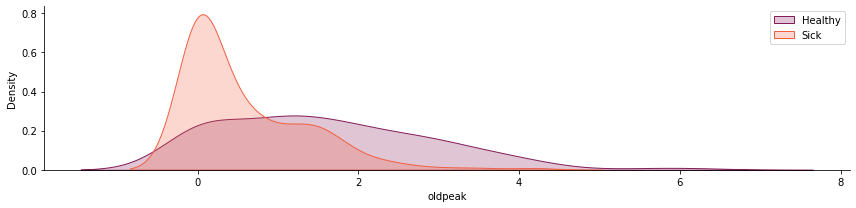

In [ ]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'oldpeak',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])

[Text(0, 0, 'value 1'), Text(0, 0, 'value 2'), Text(0, 0, 'value 3')]

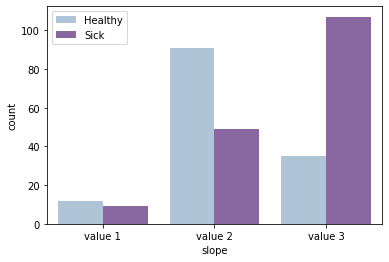

In [ ]:
fig = sns.countplot(x = 'slope', data = df, hue = 'target', palette='BuPu')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'value 1','value 2', 'value 3'])

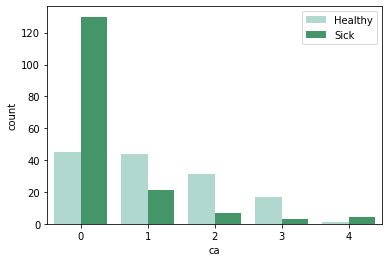

In [ ]:
fig = sns.countplot(x = 'ca', data = df, hue = 'target', palette='BuGn')
plt.legend(['Healthy', 'Sick'])

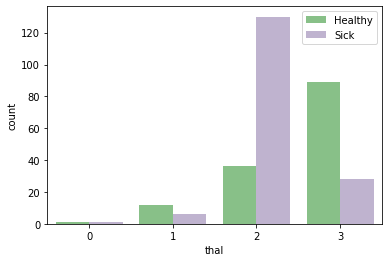

In [ ]:
fig = sns.countplot(x = 'thal', data = df, hue = 'target', palette='Accent')
plt.legend(['Healthy', 'Sick']) 

In [ ]:
x.shape

(3939, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7,stratify=y)

In [ ]:
x.shape

(3939, 1)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': np.arange(10,200,10)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naives Bayes':{
        'model':GaussianNB(),
        'params':{}
    },
    'KNN':{
            'model':KNeighborsClassifier(),
            'params':{
                'n_neighbors':np.arange(1,22)
            }
        },
        'Decision Tree':{
            'model':tree.DecisionTreeClassifier(),
            'params':{}
        },
}

In [ ]:
CVscores=[]

In [ ]:
for model_name, mp in model_params.items():
    cross_vali =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    cross_vali.fit(X_train, y_train)

    CVscores.append({
        'model': model_name,
        'best_score': cross_vali.best_score_,
        'best_params': cross_vali.best_params_
    })
    
cross_vali_DF = pd.DataFrame(CVscores,columns=['model','best_score','best_params'])

In [ ]:
column_cv = cross_vali_DF["best_score"]
cv_max_index = column_cv.idxmax()

In [ ]:
train_split_X = [CVscores[0]['best_score'],CVscores[1]['best_score'],CVscores[2]['best_score'],CVscores[3]['best_score'],CVscores[4]['best_score'],CVscores[5]['best_score']]
train_split_Y=[CVscores[0]['model'],CVscores[1]['model'],CVscores[2]['model'],CVscores[3]['model'],CVscores[4]['model'],CVscores[5]['model']]  
fig = plt.figure(figsize = (10, 5))
  
# creating the bar plot
plt.bar(train_split_Y, train_split_X, color ='black',width = 0.4)
print(CVscores[cv_max_index]['model'],'give better accuracy... ',CVscores[cv_max_index]['model'],'accuracy is',CVscores[cv_max_index]['best_score'],'best params is ',CVscores[cv_max_index]['best_params'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("GridSearchCV model comparison")
plt.show()

In [ ]:
best_model=RandomForestClassifier()
trained_model=best_model.fit(X_train,y_train) 

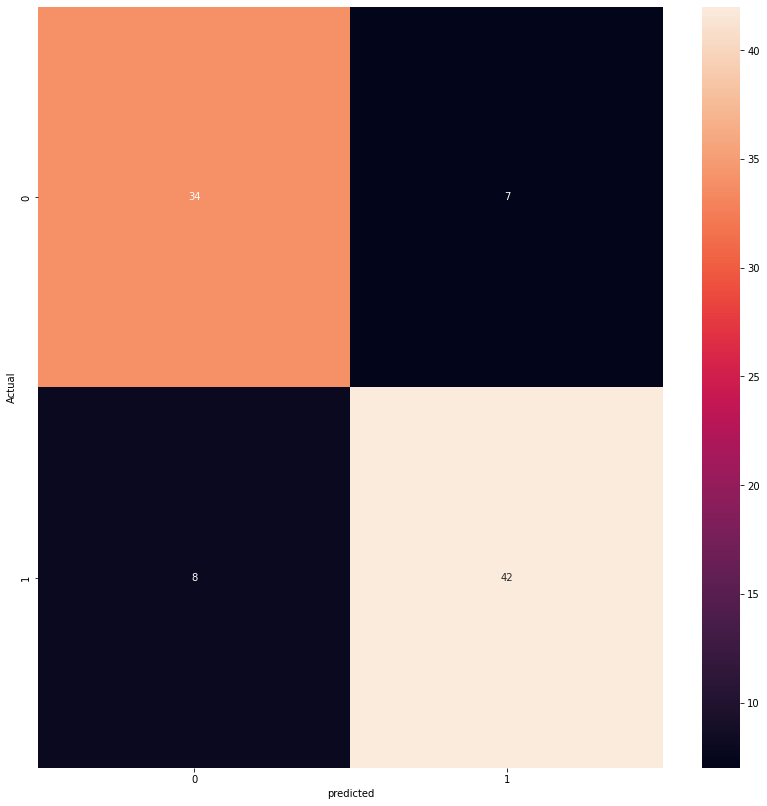

In [ ]:
test_Score=best_model.predict(X_test)
test_CM=confusion_matrix(y_test,test_Score)
plt.figure(figsize=(14, 14))
sns.heatmap(test_CM,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show() 

In [ ]:
dump(best_model, 'model.joblib' ) 

['model.joblib']